<a href="https://colab.research.google.com/github/segravjf/klackers/blob/main/klackers_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from random import randint
import itertools
from math import floor

In [10]:
## initialize a klackers board

def initialize_klackers_board():
  board = list(range(1,10))
  return board

In [11]:
## do a dice roll based on the number of dice chosen

def roll_dice(n):
  dice_sum = 0
  for i in range(0,n):
    roll = randint(1,6)
    dice_sum = dice_sum + roll
  return dice_sum

In [12]:
## from the list of available klacks and the dice roll, return all combinations that could be knocked down

def generate_combinations(board):
  return itertools.chain.from_iterable((itertools.combinations(board,i) for i in range(len(board)+1)))

def return_options(dice_sum, board):
  return list(filter(lambda v: sum(v) == dice_sum, generate_combinations(board)))

In [13]:
## for a chosen combination, knock down the klackers from the board
def knock_down_klackers(board, combo):
  for i in combo:
    del board[board.index(i)]
  return board

In [14]:
## create a strategy to decide which combination to knock down
def remove_highest_klack(combos):
  return max(combos)

def remove_most_klacks(combos):
  return max(combos,key=len)

def remove_lowest_klack(combos):
  return min(combos)

def remove_midpoint_klack(combos):
  if len(combos) % 2 == 0:
    mp = floor(len(combos)/2) - 1
  else:
    mp = floor(len(combos)/2)
  return combos[mp]

def knock_down_klacks(board, combos, strat):
  if strat == "highest number remaining":
    chosen_comb = remove_highest_klack(combos)
    ## print("Removing the following from the board: ",chosen_comb)
  if strat == "most at once":
    chosen_comb = remove_most_klacks(combos)
  if strat == "lowest number remaining":
    chosen_comb = remove_lowest_klack(combos)
  if strat == "midpoint":
    chosen_comb = remove_midpoint_klack(combos)
  new_board = knock_down_klackers(board = board, combo = chosen_comb)
  return new_board

In [15]:
## set up game logic
def play_a_round(board, strategy):
  ## declare some gamestate markers
  keep_rolling = True
  ## determine how many dice to use
  while keep_rolling:
    if sum(board) > 6:
      roll = roll_dice(2)
      ## print("Roll with 2 dice: ",roll)
    else:
      roll = roll_dice(1)
      ## print("Roll with 1 dice: ",roll)
      keep_rolling = False
  ## roll a dice and remove klackers
    options = return_options(roll, board)
    ## print("The options to knock down are: ", options)
    if len(options) == 0:
      ## print("No matches remaining :(")
      keep_rolling = False
    else:
      board = knock_down_klacks(board, options, strategy)
      ## print("Remaining klackers on the board: ", board)
      if len(board) == 0:
        keep_rolling = False
  return board

In [16]:
## play klackers!
def play_klackers(strategy):
  board = initialize_klackers_board()
  board = play_a_round(board=board, strategy=strategy)
  ## print("Klackers left: ",len(board))
  ## print("Sum of klackers left: ",sum(board))
  ## if sum(board) == 0:
    ## print("CONGRATS! YOU WIN!!")
  #else:
    #print("Sorry, you didn't win.")
  return board

In [17]:
play_klackers(strategy="highest number remaining")

[1]

In [18]:
brd = initialize_klackers_board()
print("Initializing new klackers board")
roll = roll_dice(2)
print("You rolled a ",roll)
combos = generate_combinations(brd)
options = return_options(roll, brd)
print("The options to knock down are: ", options)
brd = knock_down_klacks(brd, options, "highest number remaining")
print("Remaining klackers on the board: ",brd)

Initializing new klackers board
You rolled a  8
The options to knock down are:  [(8,), (1, 7), (2, 6), (3, 5), (1, 2, 5), (1, 3, 4)]
Remaining klackers on the board:  [1, 2, 3, 4, 5, 6, 7, 9]


In [19]:
results_largest_num = []
results_lowest_num = []
results_most_num = []
results_midpoint = []
sims = 10000
for i in range(sims):
  results_largest_num.append(play_klackers(strategy="highest number remaining"))
  results_most_num.append(play_klackers(strategy="most at once"))
  results_lowest_num.append(play_klackers(strategy="lowest number remaining"))
  results_midpoint.append(play_klackers(strategy="midpoint"))

In [20]:
winners = [i for i in results_largest_num if len(i) == 0]
len(winners)

782

In [21]:
winners = [i for i in results_most_num if len(i) == 0]
len(winners)

103

In [22]:
winners = [i for i in results_lowest_num if len(i) == 0]
len(winners)

113

In [23]:
winners = [i for i in results_midpoint if len(i) == 0]
len(winners)

284

In [50]:
## Assemble a dataset
import pandas as pd

remainder = []
cnt = []
large_num = []
strat = []
results = ['results_largest_num',
           'results_lowest_num',
           'results_midpoint',
           'results_most_num']

for r in results:
  dat = globals()[r]
  for i in dat:
    remainder.append(sum(i))
    cnt.append(len(i))
    large_num.append(sum(1 for j in i if j > 7))
    strat.append(r)

df = pd.DataFrame(
    {'remainder': remainder,
     'count': cnt,
     'large numbers remaining': large_num,
     'strategy': strat}
)

df.head()

,remainder,count,large numbers remaining,strategy
0,16,3,1,results_largest_num
1,10,3,0,results_largest_num
2,25,5,2,results_largest_num
3,14,3,1,results_largest_num
4,1,1,0,results_largest_num


In [53]:
## Let's do some quick stats!
by_strat = df.groupby(['strategy'])
by_strat.describe()

remainder                                                  \
                        count     mean       std  min   25%   50%   75%   max   
strategy                                                                        
results_largest_num   10000.0  12.2003  8.198726  0.0   6.0  11.0  18.0  43.0   
results_lowest_num    10000.0  24.2395  8.609446  0.0  18.0  25.0  30.0  43.0   
results_midpoint      10000.0  19.2639  8.776238  0.0  13.0  19.0  25.0  43.0   
results_most_num      10000.0  24.0781  8.569758  0.0  18.0  24.0  30.0  43.0   

                       count          ...           large numbers remaining  \
                       count    mean  ...  75%  max                   count   
strategy                              ...                                     
results_largest_num  10000.0  2.4181  ...  3.0  8.0                 10000.0   
results_lowest_num   10000.0  3.5701  ...  5.0  8.0                 10000.0   
results_midpoint     10000.0  3.2107  ...  4.0  8.0                 10000.0   
results_most_num     10000.0  3.5394  ...  4.0  8.0                 10000.0   

                                                                
                       mean       std  min  25%  50%  75%  max  
strategy                                                        
results_largest_num  0.7866  0.728775  0.0  0.0  1.0  1.0  2.0  
results_lowest_num   1.5432  0.606111  0.0  1.0  2.0  2.0  2.0  
results_midpoint     1.2298  0.692127  0.0  1.0  1.0  2.0  2.0  
results_most_num     1.5381  0.608264  0.0  1.0  2.0  2.0  2.0  

[4 rows x 24 columns]

<Axes: xlabel='strategy', ylabel='remainder'>

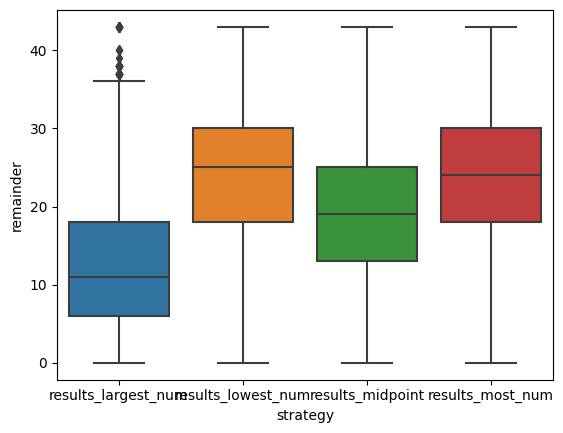

In [56]:
## Chart the distribution of the remaining tiles by strategy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.boxplot(x='strategy',y='remainder',data=df)

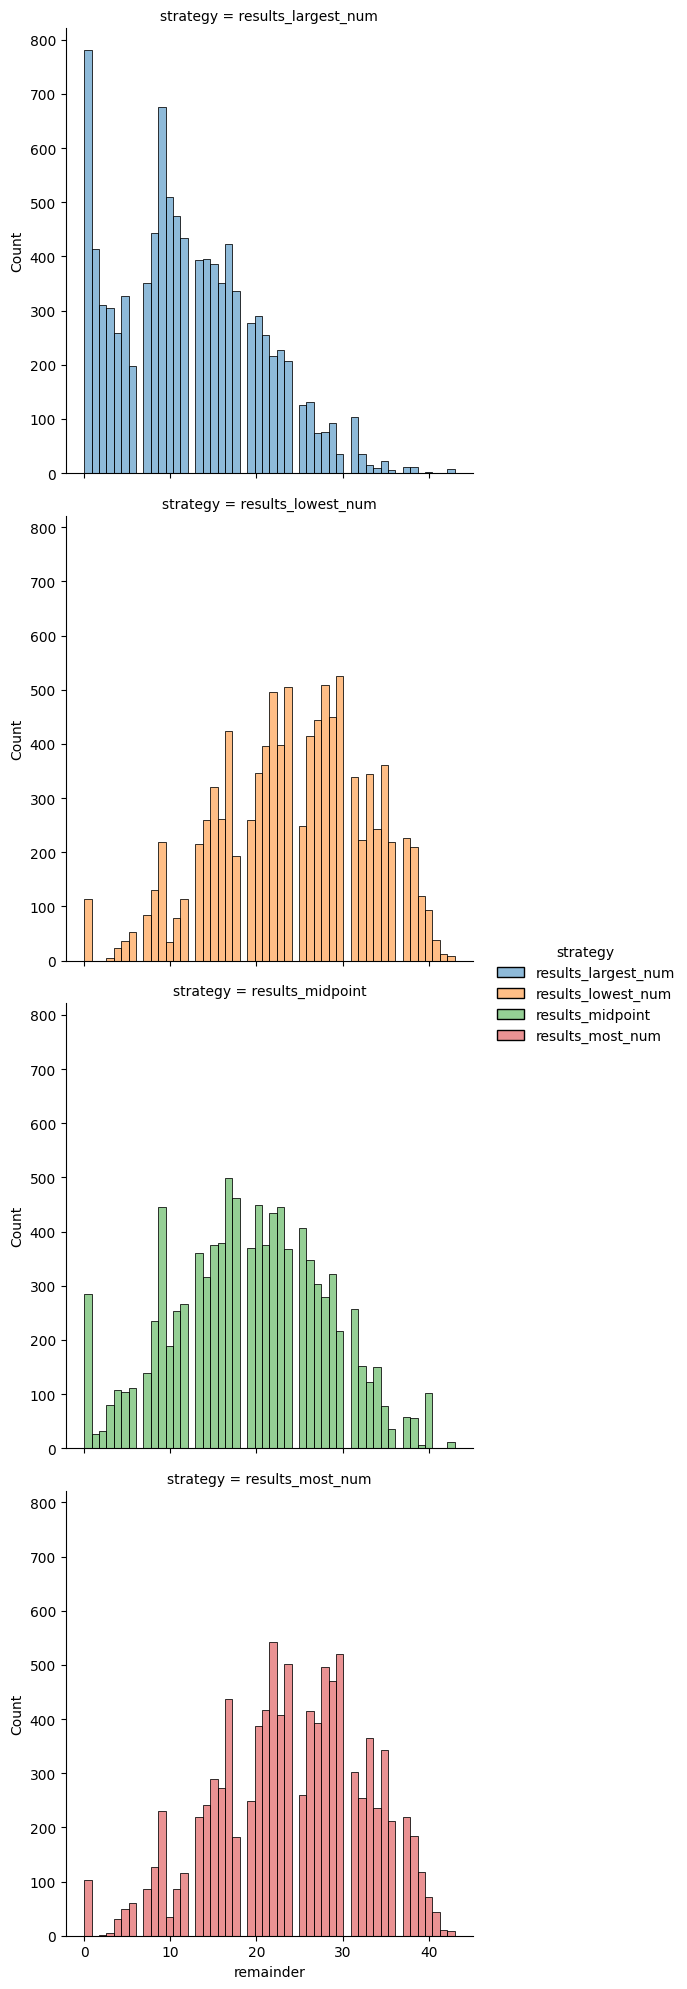

In [61]:
sns.displot(data = df, x='remainder', hue='strategy', row = 'strategy')

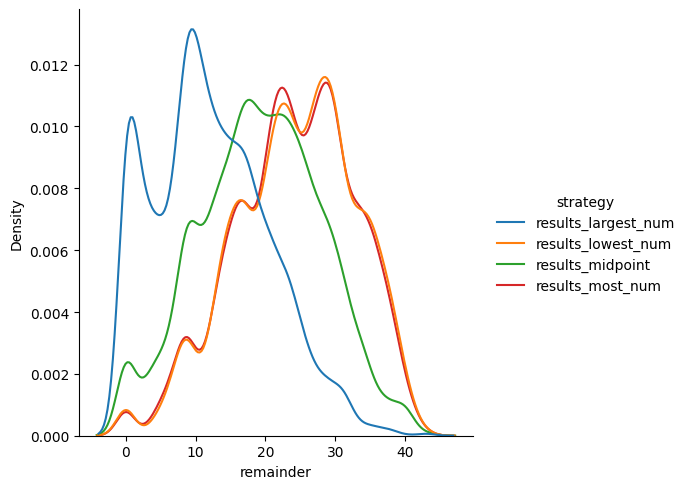

In [68]:
sns.displot(data = df, x = 'remainder', hue = 'strategy', kind = 'kde')